<a href="https://colab.research.google.com/github/fahmij8/Metode-Numerik/blob/master/Anum_Modified_Euler_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Komputasi dan Analisis Numerik
### Modified Euler Methods
---
#### Nama : Fahmi Jabbar

##### NIM :1801389

In [0]:
#@title Import module
!pip3 install PTable
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integral
import math

from prettytable import PrettyTable
from math import *
from matplotlib import style
style.use("seaborn")

In [0]:
def modifiedEuler(f, f_real, y0, x0, xt, h):
  #List untuk y metode euler
  y_euler = eulerMethod(f, f_real, y0, x0, xt, h)

  #List untuk n,x of n
  firstx = x0
  x = [x0]
  count = 0
  num = [count]
  actual = [f_real(y0, x0)]
  while x0 < xt :
    x0 = x0 + h
    count = count + 1
    num.append(count)
    x.append(x0)
  
  #List untuk y modified euler
  y = np.zeros(len(x))
  y[0] = y0
  yp = y
  n = []
  for n in range(0,len(x)-1):
    yp[n+1] = y[n] + h*f(y[n],x[n])
    for n in range(0, len(x)-1):
      y[n+1] = y[n] +h/2*(f(y[n],x[n])+f(yp[n+1],x[n+1]))

  #List untuk y sebenarnya
  number = 0
  while firstx < xt :
    firstx += h
    actual.append(f_real(y[number], firstx))
    number += 1
   
  return y,x,num,actual,y_euler[0]

In [0]:
def eulerMethod(f, f_real, y0, x0, xt, h):
  #List untuk n,x,dan y actual
  x = [x0]
  count = 0
  num = [count]
  actual = [f_real(y0, x0)]
  while x0 < xt :
    x0 = x0 + h
    count = count + 1
    num.append(count)
    actual.append(f_real(y0, x0))
    x.append(x0)
  
  #List untuk y euler
  y = np.zeros(len(x))
  y[0] = y0
  n = []
  for n in range(0,len(x)-1):
    y[n+1] = y[n] + f(y[n],x[n])*(x[n+1] - x[n])

  return y,x,num,actual

In [0]:
def visualize(result):
  mine = PrettyTable()
  mine.field_names = ["n","x of n", "y (Euler)", "y (Modified Euler)", "y (Actual)"]
  fill = 0
  for i in range(0, len(result[0])):
    mine.add_row([result[2][i], result[1][i], result[4][i], result[0][i], result[3][i]])
  print(mine)
  plt.plot(result[1],result[0],'b.-',result[1],result[3],'r-',result[1],result[4],'g.-')
  plt.legend(['Modified Euler','Actual Y','Metode Euler'])
  plt.grid(True)
  plt.title("Grafik fungsi $y(x) = " + fungsi + "$")
  plt.show()

## Soal No.1
Gunakan metode euler pada fungsi berikut :

$y(x) = x^{2} $ dimana kondisi awal $x_{0} = 1$ dan $y_{0} = 1$;
 
dengan langkah = $0.1$ tentukan ketika  $x = 1,5$ !


+---+--------------------+--------------------+--------------------+--------------------+
| n |       x of n       |     y (Euler)      | y (Modified Euler) |     y (Actual)     |
+---+--------------------+--------------------+--------------------+--------------------+
| 0 |         1          |        1.0         |        1.0         |         1          |
| 1 |        1.1         | 1.2000000000000002 |        1.21        | 1.2100000000000002 |
| 2 | 1.2000000000000002 | 1.4200000000000004 |        1.44        | 1.4400000000000004 |
| 3 | 1.3000000000000003 | 1.6600000000000006 |        1.69        | 1.6900000000000006 |
| 4 | 1.4000000000000004 | 1.9200000000000008 |        1.96        | 1.960000000000001  |
| 5 | 1.5000000000000004 | 2.200000000000001  |        2.25        | 2.2500000000000013 |
+---+--------------------+--------------------+--------------------+--------------------+


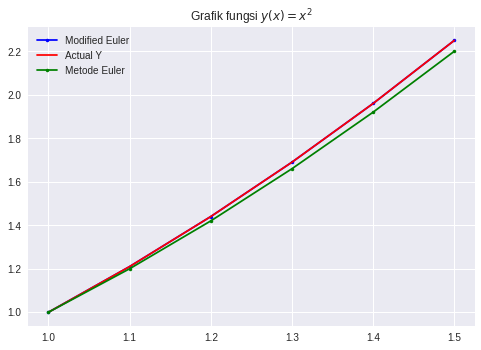

In [0]:
x0 = 1 #posisi awal x
y0 = 1 #posisi awal y
h = 0.1 #langkah
xt = 1.5 #tujuan x
f = lambda y,x: 2*x #fungsi dy/dx
f_real = lambda y,x : x**2 #fungsi y(x)
fungsi = "x^{2}" #tulis fungsi untuk judul grafik

result = modifiedEuler(f, f_real, y0, x0, xt, h)
visualize(result)

## Soal No.2
Gunakan metode euler pada fungsi berikut :

$y(x) = sin(x) $ dimana kondisi awal $x_{0} = 0$ dan $y_{0} = 0$;
 
dengan langkah = $0.5$ tentukan ketika  $x = 3$ !



+---+--------+--------------------+--------------------+--------------------+
| n | x of n |     y (Euler)      | y (Modified Euler) |     y (Actual)     |
+---+--------+--------------------+--------------------+--------------------+
| 0 |   0    |        0.0         |        0.0         |        0.0         |
| 1 |  0.5   |        0.5         | 0.4693956404725932 | 0.479425538604203  |
| 2 |  1.0   | 0.9387912809451864 | 0.8238668574122213 | 0.8414709848078965 |
| 3 |  1.5   | 1.2089424338792563 | 0.976626734296182  | 0.9974949866040544 |
| 4 |  2.0   | 1.2443110347131077 | 0.8902743255763221 | 0.9092974268256817 |
| 5 |  2.5   | 1.0362376164395364 | 0.5859517125528031 | 0.5984721441039565 |
| 6 |  3.0   | 0.6356658086660696 | 0.1381676845159583 | 0.1411200080598672 |
+---+--------+--------------------+--------------------+--------------------+


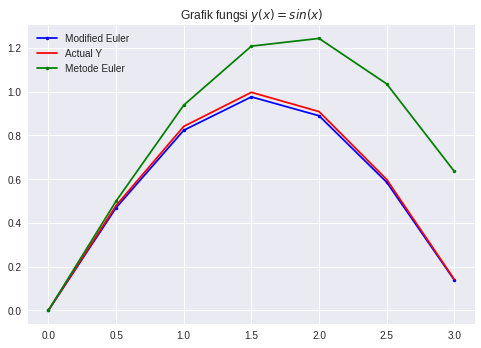

In [0]:
x0 = 0 #posisi awal x
y0 = 0 #posisi awal y
h = 0.5 #langkah
xt = 3 #tujuan x
f = lambda y,x: np.cos(x) #fungsi dy/dx
f_real = lambda y,x : np.sin(x) #fungsi y(x)
fungsi = "sin(x)" #tulis fungsi untuk judul grafik

result = modifiedEuler(f, f_real, y0, x0, xt, h)
visualize(result)